# How things go wrong for a stochastic MJP model of gene expression

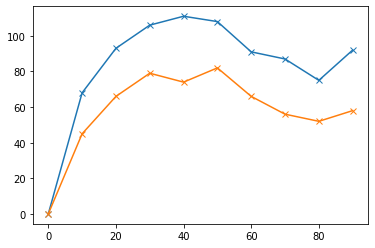

In [29]:
from study_abc_noise.model import MRNATranscriptionModelVars as ModelVars
import pyabc
import pickle
import matplotlib.pyplot as plt

n_t = 10
mv = ModelVars(noise_success_probability=0.7, n_t=n_t)

model = mv.get_model()
model_noisy = mv.get_model_noisy()
prior = mv.get_prior()

def get_data():
    try:
        data_nonoise, data = pickle.save(open(f"data_{n_t}.dat", 'rb'))
    except:
        data_nonoise = model(mv.p_true)
        data = mv.add_noise_to_data(data_nonoise)
        pickle.dump((data_nonoise, data), open(f"data_{n_t}.dat", 'wb'))
    return data_nonoise, data

data_nonoise, data = get_data()

distance = mv.get_distance()
kernel = mv.get_kernel()
temperature = pyabc.Temperature()
acceptor = pyabc.StochasticAcceptor()

plt.plot(data_nonoise['t'], data_nonoise['mrna'], 'x-')
plt.plot(data['t'], data['mrna'], 'x-')

In [30]:
abc = pyabc.ABCSMC(model, prior, distance)
abc.new("sqlite:///h_incorrect.db", data)
abc.run(max_nr_populations=15)

INFO:History:Start <ABCSMC(id=3, start_time=2019-11-21 19:47:08.097725, end_time=None)>
INFO:ABC:Calibration sample before t=0.
INFO:Epsilon:initial epsilon is 36446.49999999996
INFO:ABC:t: 0, eps: 36446.49999999996.
INFO:ABC:Acceptance rate: 100 / 242 = 4.1322e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 13108.999999999995.
Process Process-245:
Process Process-246:
Process Process-248:
Traceback (most recent call last):
Traceback (most recent call last):
Process Process-247:
  File "/home/yannik/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/yannik/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/yannik/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/yannik/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (mo

KeyboardInterrupt: 

  File "/home/yannik/ssa/ssa/model.py", line 90, in simulate
    ret = self.engine.execute(tasks)
  File "/home/yannik/pyabc/pyabc/model.py", line 270, in sample
    return self.sample_function(pars)
  File "/home/yannik/pyabc/pyabc/model.py", line 121, in summary_statistics
    raw_data = self.sample(pars)
  File "/home/yannik/ssa/ssa/engine.py", line 55, in execute
    ret.append(task.execute())
  File "/home/yannik/Documents/Project8_pyABC_Noise/Study-ABC-Noise/study_abc_noise/model/mrna_transcription.py", line 66, in model
    result = ssa_model.simulate(n_reps=1)
  File "/home/yannik/ssa/ssa/model.py", line 90, in simulate
    ret = self.engine.execute(tasks)
  File "/home/yannik/ssa/ssa/model.py", line 90, in simulate
    ret = self.engine.execute(tasks)
  File "/home/yannik/ssa/ssa/engine.py", line 55, in execute
    ret.append(task.execute())
  File "/home/yannik/ssa/ssa/engine.py", line 24, in execute
    return self.alg(**self.alg_args)
  File "/home/yannik/pyabc/pyabc/model.

In [ ]:
abc = pyabc.ABCSMC(model, prior, kernel, eps=temperature, acceptor=acceptor)
abc.new("sqlite:///h_stochastic_acceptor.db", data)
abc.run()

INFO:History:Start <ABCSMC(id=3, start_time=2019-11-21 19:47:23.105619, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=-4.9335e+01 for t=0.
INFO:ABC:t: 0, eps: 809.8485262490996.
DEBUG:Acceptor:Encountered pd=-2.9796e+01 > c=-4.9335e+01, thus weight=1.0244e+00.
DEBUG:Acceptor:Encountered pd=-4.2668e+01 > c=-4.9335e+01, thus weight=1.0083e+00.
DEBUG:Acceptor:Encountered pd=-2.6698e+01 > c=-4.9335e+01, thus weight=1.0283e+00.
DEBUG:Acceptor:Encountered pd=-4.3354e+01 > c=-4.9335e+01, thus weight=1.0074e+00.
DEBUG:Acceptor:Encountered pd=-3.3985e+01 > c=-4.9335e+01, thus weight=1.0191e+00.
DEBUG:Acceptor:Encountered pd=-4.7586e+01 > c=-4.9335e+01, thus weight=1.0022e+00.
DEBUG:Acceptor:Encountered pd=-4.5004e+01 > c=-4.9335e+01, thus weight=1.0054e+00.
DEBUG:Acceptor:Encountered pd=-4.6026e+01 > c=-4.9335e+01, thus weight=1.0041e+00.
DEBUG:Acceptor:Encountered pd=-4.6628e+01 > c=-4.9335e+01, thus weight=1.0033e+00.
INFO:ABC:Acceptance rate: 100 / 317 = 3.1

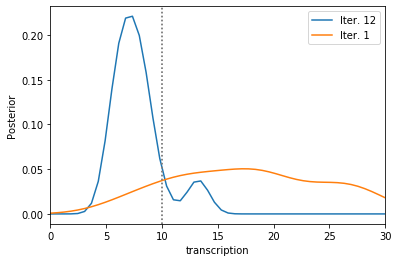

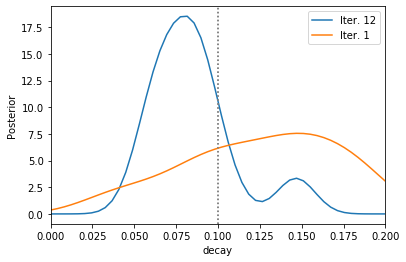

In [28]:
def plot(h, x, ax, limits, p_true):
    for t in range(h.max_t, h.max_t + 1):
        pyabc.visualization.plot_kde_1d_highlevel(
            h, t=t, x=x, xmin=limits[x][0], xmax=limits[x][1], ax=ax,
            refval=p_true, label=f"Iter. {t}")
    ax.legend()
    return ax

h_incorrect = pyabc.History("sqlite:///h_incorrect.db")
h = pyabc.History("sqlite:///h_stochastic_acceptor.db")

for p in mv.p_true:
    _, ax = plt.subplots()
    plot(h_incorrect, p, ax, mv.limits, mv.p_true)
    plot(h, p, ax, mv.limits, mv.p_true)